In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.seterr(all="warn")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## 1) Implement linear regression algorithm with gradient descent optimization.


In [ ]:
data=pd.read_csv("weight-height.csv")
data=data.drop("Gender",axis="columns")
train=data.iloc[:int(len(data)*80/100),:]
test=data.iloc[int(len(data)*80/100):,:]
train

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
7995,58.145653,112.035274
7996,58.771639,103.537756
7997,62.826904,118.851401
7998,62.202404,133.552942


In [ ]:
X = train.iloc[:, 0]
Y = train.iloc[:, 1]
X

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
7995    58.145653
7996    58.771639
7997    62.826904
7998    62.202404
7999    61.333935
Name: Height, Length: 8000, dtype: float64

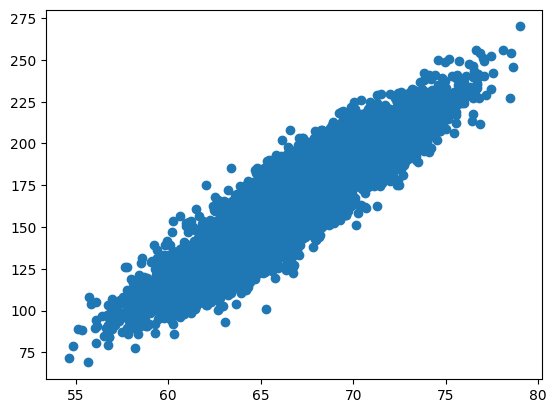

In [ ]:
plt.scatter(X, Y)
plt.show()

In [ ]:
X,Y=np.array(X), np.array(Y)
X

array([73.84701702, 68.78190405, 74.11010539, ..., 62.82690374,
       62.2024039 , 61.33393465])

In [ ]:
Y

array([241.89356318, 162.31047252, 212.74085556, ..., 118.85140135,
       133.55294169, 127.65543915])

In [ ]:
def gradient_descent(X,Y):
    t1=t2=0
    epochs=10000
    m=len(X)
    alpha=0.00005

    for iteration in range(epochs):
        hypothesis=np.dot(t1,X) + t2
        delta_a=((2*alpha)/m)*sum(X*(hypothesis-Y))
        delta_b=((2*alpha)/m)*sum(hypothesis-Y)
        t1=t1-delta_a
        t2=t2-delta_b

    return (t1,t2,hypothesis)

In [ ]:
t1,t2,Y_predicted=gradient_descent(X,Y)

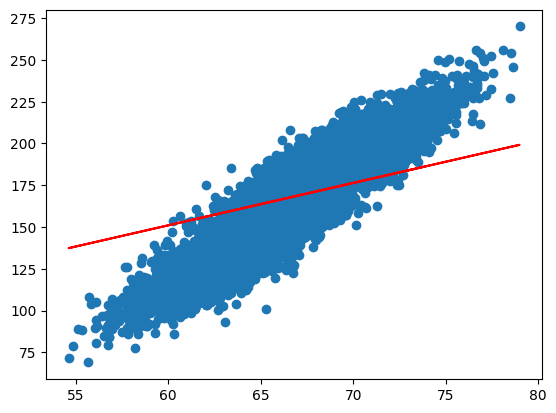

In [ ]:
plt.scatter(X,Y)
plt.plot(X,Y_predicted,color='red')
plt.show()

In [ ]:
Y_predicted

array([186.12525111, 173.28491345, 186.79219449, ..., 158.18866285,
       156.60552169, 154.40390477])

## 2) Use appropriate Scikit/SKlearn Library function to apply linear regression on the given datasets and compare the results with your implementation.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Height-weight.csv

In [ ]:
df=pd.read_csv("weight-height.csv")
df=df.drop("Gender",axis="columns")
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [ ]:
x=df["Height"]
y=df["Weight"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train=np.array(x_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [ ]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

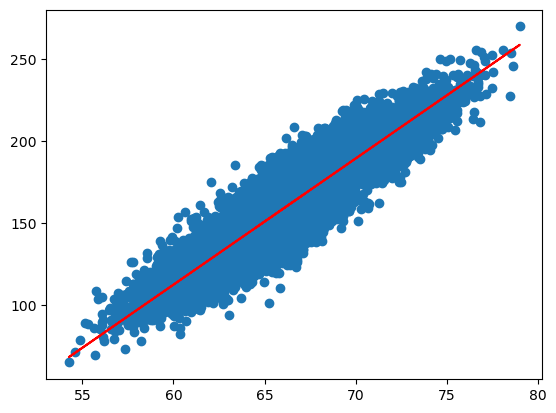

In [ ]:
plt.scatter(df.Height,df.Weight)
plt.plot(x_train,reg.predict(x_train), color="red")

In [ ]:
reg.score(x_test,y_test)

0.8469728691626437